In [1]:
import pprint
import time
from premise.electricity import Electricity
from premise import *
import brightway2 as bw

In [2]:
bw.projects.set_current("premise")

In [3]:
bw.databases

Databases dictionary with 6 object(s):
	biosphere3
	ecoinvent 3.8 cutoff
	ecoinvent_image_SSP2-RCP19_2050
	ecoinvent_remind_SSP2-PkBudg900_2050
	null
	test_elec3

In [4]:
#clear_cache()

In [5]:
start = time.time()

ndb = NewDatabase(
        scenarios = [
            {"model":"image", "pathway":"SSP2-Base", "year":2050},
            #{"model":"remind", "pathway":"SSP2-Base", "year":2025},
            #{"model":"image", "pathway":"SSP2-Base", "year":2030},
        ],
        source_db="ecoinvent 3.8 cutoff", 
        source_version="3.8",
        key='tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=',
        use_cached_inventories=True,
        use_cached_database=True,
    #additional_inventories={"fp": "C:Dropbox/steel"}
    )

ndb.update_electricity()

#ndb.write_db_to_brightway(name="test_elec3")

end = time.time()
print(end-start)

+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Install it via                                                   |
| pip install premise_gwp                                          |
| or                                                               |
| conda install -c romainsacchi premise_gwp                        |
|                                                                  |
| Within your bw2 project:        

In [6]:
ndb.write_superstructure_db_to_brightway()

Scenario difference file exported to /Users/romain/GitHub/premise/premise/data/export/scenario diff files/super_db_3.8_2022-02-02.xlsx!
Exporting super_db_3.8_2022-02-02...
20732 datasets
647640 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:16


Title: Writing activities to SQLite3 database:
  Started: 02/02/2022 19:35:13
  Finished: 02/02/2022 19:35:30
  Total time elapsed: 00:00:16
  CPU %: 98.20
  Memory %: 12.07
Created database: super_db_3.8_2022-02-02
Done!


In [ ]:
next(df)

In [11]:
from premise.utils import c, s

In [12]:
ndb.database.loc[ndb.database[(s.exchange, c.type)]=="biosphere"]

s.exchange              \
                                          c.prod_name c.prod_prod   
12                                     Potassium, ion           -   
13                                           Chloride           -   
14                                              Water           -   
32              PAH, polycyclic aromatic hydrocarbons           -   
33                                          Magnesium           -   
...                                               ...         ...   
629130                         Carbon dioxide, fossil           -   
629131                                        Propane           -   
629132                                          Water           -   
629133  Hydrocarbons, aliphatic, alkanes, unspecified           -   
629134                                  Chromium, ion           -   

                                        \
                            c.prod_loc   
12                water::surface water   
13                water::surface water   
14                                 air   
32      air::urban air close to ground   
33      air::urban air close to ground   
...                                ...   
629130  air::urban air close to ground   
629131  air::urban air close to ground   
629132                           water   
629133  air::urban air close to ground   
629134            water::surface water   

                                                           \
                                              c.cons_name   
12                         potassium hydroxide production   
13                         potassium hydroxide production   
14                         potassium hydroxide production   
32      heat production, hardwood chips from forest, a...   
33      heat production, hardwood chips from forest, a...   
...                                                   ...   
629130                  heat and power co-generation, oil   
629131                  heat and power co-generation, oil   
629132                  heat and power co-generation, oil   
629133                  heat and power co-generation, oil   
629134                  heat and power co-generation, oil   

                                                                      \
                                              c.cons_prod c.cons_loc   
12                                    potassium hydroxide        RER   
13                                    potassium hydroxide        RER   
14                                    potassium hydroxide        RER   
32      heat, district or industrial, other than natur...        RoW   
33      heat, district or industrial, other than natur...        RoW   
...                                                   ...        ...   
629130  heat, district or industrial, other than natur...         IT   
629131  heat, district or industrial, other than natur...         IT   
629132  heat, district or industrial, other than natur...         IT   
629133  heat, district or industrial, other than natur...         IT   
629134  heat, district or industrial, other than natur...         IT   

                                                                      \
             c.unit     c.type                            c.prod_key   
12         kilogram  biosphere  1653bf60-f682-4088-b02d-6dc44eae2786   
13         kilogram  biosphere  5e050fab-1837-4c42-b597-ed2f376f768f   
14      cubic meter  biosphere  075e433b-4be4-448e-9510-9a5029c1ce94   
32         kilogram  biosphere  9d1efa17-070a-4602-a65f-daf5056b0647   
33         kilogram  biosphere  ebfe261d-ab0d-4ade-8743-183c8c6bdcc6   
...             ...        ...                                   ...   
629130     kilogram  biosphere  f9749677-9c9f-4678-ab55-c607dfdc2cb9   
629131     kilogram  biosphere  98c66fdb-091d-46e9-a533-686f821e8f6a   
629132  cubic meter  biosphere  2404b41a-2eed-4e9d-8ab6-783946fdf5d6   
629133     kilogram  biosphere  bfa26b15-5340-441e-acb4-0bb19a4028d3   
629

In [10]:
col_names = [
    "from activity name",
    "from reference product",
    "from location",
    "from categories",
    "from database",
    "from key",
    "to activity name",
    "to reference product",
    "to location",
    "to categories",
    "to database",
    "to key",
    "flow type",
]

In [13]:
from premise.utils import c, s

In [14]:
ndb.database.columns

MultiIndex([(              s.exchange,     c.prod_name),
            (              s.exchange,     c.prod_prod),
            (              s.exchange,      c.prod_loc),
            (              s.exchange,     c.cons_name),
            (              s.exchange,     c.cons_prod),
            (              s.exchange,      c.cons_loc),
            (              s.exchange,          c.unit),
            (              s.exchange,          c.type),
            (              s.exchange,      c.prod_key),
            (              s.exchange,      c.cons_key),
            (              s.exchange,       c.exc_key),
            (             s.ecoinvent, c.cons_prod_vol),
            (             s.ecoinvent,        c.amount),
            (             s.ecoinvent,    c.efficiency),
            (             s.ecoinvent,       c.comment),
            ('image::SSP2-Base::2030', c.cons_prod_vol),
            ('image::SSP2-Base::2030',        c.amount),
            ('image::SSP2-Base:

In [19]:
df_exp = ndb.database[
    [
        (              s.exchange,     c.prod_name),
        (              s.exchange,     c.prod_prod),
        (              s.exchange,      c.prod_loc),
        (              s.exchange,     c.cons_name),
        (              s.exchange,     c.cons_prod),
        (              s.exchange,      c.cons_loc),
        (              s.exchange,          c.type)
    ]
][s.exchange].copy()

In [20]:
df_exp.head()

,c.prod_name,c.prod_prod,c.prod_loc,c.cons_name,c.cons_prod,c.cons_loc,c.type
0,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,production
1,"market for electricity, for reuse in municipal...","electricity, for reuse in municipal waste inci...",RoW,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,technosphere
2,"market group for heat, district or industrial,...","heat, district or industrial, other than natur...",RER,potassium hydroxide production,potassium hydroxide,RER,technosphere
3,"market for water, completely softened","water, completely softened",RER,potassium hydroxide production,potassium hydroxide,RER,technosphere
4,market for potassium chloride,potassium chloride,RER,potassium hydroxide production,potassium hydroxide,RER,technosphere


In [21]:
df_exp.columns = [
    "from activity name",
    "from reference product",
    "from location",
    "to activity name",
    "to reference product",
    "to location",
    "flow type",
]

In [22]:
df_exp.head()

,from activity name,from reference product,from location,to activity name,to reference product,to location,flow type
0,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,production
1,"market for electricity, for reuse in municipal...","electricity, for reuse in municipal waste inci...",RoW,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,technosphere
2,"market group for heat, district or industrial,...","heat, district or industrial, other than natur...",RER,potassium hydroxide production,potassium hydroxide,RER,technosphere
3,"market for water, completely softened","water, completely softened",RER,potassium hydroxide production,potassium hydroxide,RER,technosphere
4,market for potassium chloride,potassium chloride,RER,potassium hydroxide production,potassium hydroxide,RER,technosphere


In [34]:
df_exp["from categories"] = df_exp.loc[df_exp["flow type"]=="biosphere", "from location"]

In [35]:
df_exp["to categories"] = df_exp.loc[df_exp["flow type"]=="biosphere", "to location"]

In [36]:
df_exp.loc[df_exp["flow type"]=="biosphere",["from location", "to location"]] = ""

In [41]:
from datetime import date

In [49]:
df_exp.loc[df_exp["flow type"]=="biosphere", "from database"] = "biosphere3"
df_exp.loc[df_exp["flow type"]!="biosphere", "from database"] = f"super_db_{ndb.version}_{date.today()}"

In [50]:
df_exp.loc[df_exp["flow type"]!="biosphere", "to database"] = f"super_db_{ndb.version}_{date.today()}"

In [51]:
df_exp.head()

,from activity name,from reference product,from location,to activity name,to reference product,to location,flow type,from categories,to categories,from database,to database
0,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,production,NaN,NaN,super_db_3.8_2022-02-02,super_db_3.8_2022-02-02
1,"market for electricity, for reuse in municipal...","electricity, for reuse in municipal waste inci...",RoW,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,technosphere,NaN,NaN,super_db_3.8_2022-02-02,super_db_3.8_2022-02-02
2,"market group for heat, district or industrial,...","heat, district or industrial, other than natur...",RER,potassium hydroxide production,potassium hydroxide,RER,technosphere,NaN,NaN,super_db_3.8_2022-02-02,super_db_3.8_2022-02-02
3,"market for water, completely softened","water, completely softened",RER,potassium hydroxide production,potassium hydroxide,RER,technosphere,NaN,NaN,super_db_3.8_2022-02-02,super_db_3.8_2022-02-02
4,market for potassium chloride,potassium chloride,RER,potassium hydroxide production,potassium hydroxide,RER,technosphere,NaN,NaN,super_db_3.8_2022-02-02,super_db_3.8_2022-02-02


In [53]:
ndb.database.columns

MultiIndex([(              s.exchange,     c.prod_name),
            (              s.exchange,     c.prod_prod),
            (              s.exchange,      c.prod_loc),
            (              s.exchange,     c.cons_name),
            (              s.exchange,     c.cons_prod),
            (              s.exchange,      c.cons_loc),
            (              s.exchange,          c.unit),
            (              s.exchange,          c.type),
            (              s.exchange,      c.prod_key),
            (              s.exchange,      c.cons_key),
            (              s.exchange,       c.exc_key),
            (             s.ecoinvent, c.cons_prod_vol),
            (             s.ecoinvent,        c.amount),
            (             s.ecoinvent,    c.efficiency),
            (             s.ecoinvent,       c.comment),
            ('image::SSP2-Base::2030', c.cons_prod_vol),
            ('image::SSP2-Base::2030',        c.amount),
            ('image::SSP2-Base:

In [56]:
[t for t in ndb.database.columns if "c.amount" in str(t[1])]

[(<s.ecoinvent: 'ecoinvent'>, <c.amount: 'amount'>),
 ('image::SSP2-Base::2030', <c.amount: 'amount'>)]

In [106]:
import pandas as pd

In [107]:
df_vals = ndb.database[[t for t in ndb.database.columns if t[1] == c.amount]].droplevel(level=1, axis=1)

In [108]:
cols = [t for t in df_vals.columns if t != s.ecoinvent]
for t in cols:
    df_vals[t] = df_vals[t].fillna(df_vals[s.ecoinvent])

In [109]:
df_vals.head()

,s.ecoinvent,image::SSP2-Base::2030
0,1.000000,1.000000
1,1.000000,1.000000
2,2.772130,2.772130
3,2.161807,2.161807
4,1.373105,1.373105


In [113]:
df_exp.head()

,from activity name,from reference product,from location,to activity name,to reference product,to location,flow type,from categories,to categories,from database,to database
0,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,production,NaN,NaN,super_db_3.8_2022-02-02,super_db_3.8_2022-02-02
1,"market for electricity, for reuse in municipal...","electricity, for reuse in municipal waste inci...",RoW,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,technosphere,NaN,NaN,super_db_3.8_2022-02-02,super_db_3.8_2022-02-02
2,"market group for heat, district or industrial,...","heat, district or industrial, other than natur...",RER,potassium hydroxide production,potassium hydroxide,RER,technosphere,NaN,NaN,super_db_3.8_2022-02-02,super_db_3.8_2022-02-02
3,"market for water, completely softened","water, completely softened",RER,potassium hydroxide production,potassium hydroxide,RER,technosphere,NaN,NaN,super_db_3.8_2022-02-02,super_db_3.8_2022-02-02
4,market for potassium chloride,potassium chloride,RER,potassium hydroxide production,potassium hydroxide,RER,technosphere,NaN,NaN,super_db_3.8_2022-02-02,super_db_3.8_2022-02-02


In [115]:
pd.concat([df_exp[
    ["from activity name",
    "from reference product",
    "from location",
     "from categories",
    "to activity name",
    "to reference product",
    "to location",
     "to categories",
    "flow type",]
], df_vals], axis=1)

,from activity name,from reference product,from location,from categories,to activity name,to reference product,to location,to categories,flow type,s.ecoinvent,image::SSP2-Base::2030
0,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,NaN,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,NaN,production,1.000000,1.000000
1,"market for electricity, for reuse in municipal...","electricity, for reuse in municipal waste inci...",RoW,NaN,"electricity, from municipal waste incineration...","electricity, medium voltage",GR,NaN,technosphere,1.000000,1.000000
2,"market group for heat, district or industrial,...","heat, district or industrial, other than natur...",RER,NaN,potassium hydroxide production,potassium hydroxide,RER,NaN,technosphere,2.772130,2.772130
3,"market for water, completely softened","water, completely softened",RER,NaN,potassium hydroxide production,potassium hydroxide,RER,NaN,technosphere,2.161807,2.161807
4,market for potassium chloride,potassium chloride,RER,NaN,potassium hydroxide production,potassium hydroxide,RER,NaN,technosphere,1.373105,1.373105
...,...,...,...,...,...,...,...,...,...,...,...
636232,"heat and power co-generation, oil","electricity, high voltage",DE,NaN,"electricity production, at co-generation power...","electricity, high voltage",RER,NaN,technosphere,1.000000,0.971145
636233,"CO2 capture/hard coal, post, pipeline 200km, s...","CO2 capture/hard coal, post, pipeline 200km, s...",RER,NaN,"electricity production, at co-generation power...","electricity, high voltage",RER,NaN,technosphere,0.554800,0.538791
636237,"electricity production, at co-generation power...","electricity, high voltage",RER,NaN,"electricity production, at co-generation power...","electricity, high voltage",RER,NaN,production,1.000000,0.971145
636238,"heat and power co-generation, oil","electricity, high voltage",DE,NaN,"electricity production, at co-generation power...","electricity, high voltage",RER,NaN,technosphere,1.000000,0.971145


In [ ]:
ndb.database[[t for t in ndb.database.columns if t[1] == c.amount]].droplevel

In [10]:
ndb.scenarios[0].get("exclude") is None

True

In [5]:
from premise.activity_maps import InventorySet
mapping = InventorySet(ndb.database)
powerplant_map = mapping.generate_powerplant_map()
power

In [8]:
from premise.utils import s, c

In [7]:
powerplant_map["Biomass CHP CCS"]

{'electricity production, at co-generation power plant/wood, post, pipeline 200km, storage 1000m',
 'electricity production, at co-generation power plant/wood, post, pipeline 400km, storage 3000m'}

In [14]:
ndb.database.loc[
    ndb.database[(s.exchange, c.cons_name)] == "electricity production, at co-generation power plant/wood, post, pipeline 200km, storage 1000m",
    (s.exchange, c.prod_name)
]

636088    electricity production, at co-generation power...
636089    heat and power co-generation, wood chips, 6667 kW
636090             Carbon dioxide, to soil or biomass stock
636091    CO2 capture/at wood burning power plant 20 MW,...
Name: (s.exchange, c.prod_name), dtype: object

In [15]:
ndb.database.loc[
    (ndb.database[(s.exchange, c.cons_name)] == "heat and power co-generation, wood chips, 6667 kW")
    &(ndb.database[(s.exchange, c.type)] == "production"),
    (s.ecoinvent, c.efficiency)
]

10561     0.15
12265     0.15
41882     0.15
72754     0.15
91487     0.15
110977    0.15
117308    0.15
120843    0.15
129767    0.15
160422    0.15
172430    0.15
212688    0.15
235768    0.15
236580    0.15
239273    0.15
252718    0.15
260750    0.15
267988    0.15
268651    0.15
274223    0.15
326143    0.15
329296    0.15
330205    0.15
344903    0.15
354369    0.15
355157    0.15
372247    0.15
377468    0.15
388144    0.15
401008    0.15
441049    0.15
444438    0.15
452783    0.15
514312    0.15
535290    0.15
547188    0.15
579334    0.15
595538    0.15
Name: (s.ecoinvent, c.efficiency), dtype: float64

In [3]:
from premise.transformation import BaseTransformation

bt = BaseTransformation(
    ndb.database,
    ndb.iam_data,
    ndb.scenarios
)

In [4]:
d_act = bt.fetch_proxies(
        name="electricity production, natural gas, conventional",
        ref_prod="electricity, high voltage",
        production_variable="steel - secondary"
    )

In [58]:
def main():
    el = Electricity(
    ndb.database,
    ndb.iam_data,
    ndb.scenarios
    )
    df = el.update_electricity_efficiency()

In [59]:
%load_ext snakeviz
%snakeviz main()

Adjust efficiency of power plants...
Log of changes in power plants efficiencies saved in C:\Users\sacchi_r\Documents\GitHub\premise\premise\data/logs
Rescale inventories and emissions for Biomass ST
Rescale inventories and emissions for Coal PC
Rescale inventories and emissions for Gas CC
Rescale inventories and emissions for Coal IGCC
Rescale inventories and emissions for Oil CHP
Rescale inventories and emissions for Biomass IGCC
Rescale inventories and emissions for Coal CHP
Rescale inventories and emissions for Gas OC
Rescale inventories and emissions for Gas CHP
Rescale inventories and emissions for Oil ST
Rescale inventories and emissions for Oil CC
Rescale inventories and emissions for Biomass CHP
Rescale inventories and emissions for Nuclear
Done!
 
*** Profile stats marshalled to file 'C:\\Users\\sacchi_r\\AppData\\Local\\Temp\\tmp9c4p15ju'. 
Embedding SnakeViz in this document...


In [5]:
d_act['image::SSP2-Base::2020']["CHN"]

s.exchange  \
                                              c.prod_name   
604194       market for gas power plant, 100MW electrical   
604195              market for residue from cooling tower   
604196              market for natural gas, high pressure   
604197              market for water, completely softened   
604198                     market for water, decarbonised   
604199  electricity production, natural gas, conventio...   
604200                                               Lead   
604201                                             Nickel   
604202                                       Acenaphthene   
604203                                              Water   
604204                            Carbon monoxide, fossil   
604205                                             Cobalt   
604206                                           Selenium   
604207                                            Benzene   
604208                                       Formaldehyde   
604209                                             Ethane   
604210                                             Butane   
604211                                     Propionic acid   
604212  Dioxins, measured as 2,3,7,8-tetrachlorodibenz...   
604213                                     Benzo(a)pyrene   
604214                                    Methane, fossil   
604215                                    Nitrogen oxides   
604216                                            Pentane   
604217                                            Mercury   
604218                                            Toluene   
604219                                           Chromium   
604220                                     Sulfur dioxide   
604221         Water, cooling, unspecified natural origin   
604222                                              Water   
604223                                          Beryllium   
604224                                            Propane   
604225              PAH, polycyclic aromatic hydrocarbons   
604226                                            Cadmium   
604227                                        Acetic acid   
604228                                Dinitrogen monoxide   
604229                             Particulates, < 2.5 um   
604230                                          Manganese   
604231                                            Arsenic   
604232                                       Acetaldehyde   
604233                             Carbon dioxide, fossil   
604234                                             Hexane   

                                           \
                              c.prod_prod   
604194  gas power plant, 100MW electrical   
604195         residue from cooling tower   
604196         natural gas, high pressure   
604197         water, completely softened   
604198                water, decarbonised   
604199          electricity, high voltage   
604200                                  -   
604201                                  -   
604202                                  -   
604203                                  -   
604204                                  -   
604205                                  -   
604206                                  -   
604207                                  -   
604208                                  -   
604209                                  -   
604210                                  -   
604211                                  -   
604212                                  -   
604213                                  -   
604214                                  -   
604215                                  -   
604216                                  -   
604217                                  -   
604218                                  -   
604219                                  -   
604220                                  -   
604221                                  -   
604222                                  -   
604223                      

In [4]:
from premise.utils import c, s

In [10]:
ndb.database.head()

s.exchange  \
                                         c.prod_name   
0  electricity, from municipal waste incineration...   
1  market for electricity, for reuse in municipal...   
2  market group for heat, district or industrial,...   
3              market for water, completely softened   
4                      market for potassium chloride   

                                                                 \
                                         c.prod_prod c.prod_loc   
0                        electricity, medium voltage         GR   
1  electricity, for reuse in municipal waste inci...        RoW   
2  heat, district or industrial, other than natur...        RER   
3                         water, completely softened        RER   
4                                 potassium chloride        RER   

                                                      \
                                         c.cons_name   
0  electricity, from municipal waste incineration...   
1  electricity, from municipal waste incineration...   
2                     potassium hydroxide production   
3                     potassium hydroxide production   
4                     potassium hydroxide production   

                                                                        \
                   c.cons_prod c.cons_loc         c.unit        c.type   
0  electricity, medium voltage         GR  kilowatt hour    production   
1  electricity, medium voltage         GR  kilowatt hour  technosphere   
2          potassium hydroxide        RER      megajoule  technosphere   
3          potassium hydroxide        RER       kilogram  technosphere   
4          potassium hydroxide        RER       kilogram  technosphere   

                                                                 ...  \
                      c.prod_key                     c.cons_key  ...   
0   4139726075549533773121673047   4139726075549533773121673047  ...   
1  35771651354760358760341134163   4139726075549533773121673047  ...   
2  20975344617450743462149413970  32979525793446964959320044041  ...   
3  65146431084006150500313896393  32979525793446964959320044041  ...   
4  31118248217760212008456303434  32979525793446964959320044041  ...   

  image::SSP2-Base::2020           remind::SSP2-Base::2025                  \
            c.efficiency c.comment                c.amount c.cons_prod_vol   
0                    NaN                               NaN             NaN   
1                    NaN                               NaN             NaN   
2                    NaN                               NaN             NaN   
3                    NaN                               NaN             NaN   
4                    NaN                               NaN             NaN   

                         image::SSP2-Base::2030                               \
  c.efficiency c.comment               c.amount c.cons_prod_vol c.efficiency   
0          NaN                              NaN             NaN          NaN   
1          NaN                              NaN             NaN          NaN   
2          NaN                              NaN             NaN          NaN   
3          NaN                              NaN             NaN          NaN   
4          NaN                              NaN             NaN          NaN   

             
  c.comment  
0            
1            
2            
3            
4            

[5 rows x 27 columns]

In [6]:
d_act['image::SSP2-Base::2020']

{'CHN': 'CN-HN',
 'CEU': 'BG',
 'WEU': 'GB',
 'INDIA': 'IN-AP',
 'KOR': 'KR',
 'USA': 'US-RFC',
 'INDO': 'ID',
 'BRA': 'BR-North-eastern grid',
 'CAN': 'CA-MB',
 'RSAM': 'CO',
 'SEAS': 'MY',
 'JAP': 'JP',
 'TUR': 'TR',
 'ME': 'IR',
 'World': 'RoW',
 'UKR': 'UA',
 'MEX': 'MX',
 'RSAF': 'TZ',
 'OCE': 'AU',
 'RUS': 'RU'}

In [15]:
exc_stack[0].loc[
    :, ('image::SSP2-Base::2020', c.amount)
]

142228    1
Name: (image::SSP2-Base::2020, c.amount), dtype: int64

In [16]:
ndb.iam_data.emissions

<xarray.DataArray 'value' (scenario: 3, region: 12, pollutant: 7, year: 3, sector: 2)>
array([[[[[1.        , 1.        ],
          [       nan,        nan],
          [       nan,        nan]],

         [[1.        , 1.        ],
          [       nan,        nan],
          [       nan,        nan]],

         [[1.        , 1.        ],
          [       nan,        nan],
          [       nan,        nan]],

         ...,

         [[1.        , 1.        ],
          [       nan,        nan],
          [       nan,        nan]],

         [[1.        , 1.        ],
          [       nan,        nan],
...
          [       nan,        nan],
          [1.0585971 , 1.        ]],

         [[       nan,        nan],
          [       nan,        nan],
          [1.        , 1.        ]],

         ...,

         [[       nan,        nan],
          [       nan,        nan],
          [1.        , 1.        ]],

         [[       nan,        nan],
          [       nan,        nan],
          [1.21209166, 1.06844581]],

         [[       nan,        nan],
          [       nan,        nan],
          [1.        , 1.        ]]]]])
Coordinates:
  * year       (year) int64 2020 2025 2030
  * region     (region) object 'CAZ' 'CHA' 'EUR' 'IND' ... 'REF' 'SSA' 'USA'
  * pollutant  (pollutant) object 'BC' 'CO' 'NH3' 'NOx' 'OC' 'SO2' 'VOC'
  * sector     (sector) object 'steel' 'cement'
  * scenario   (scenario) <U23 'image::SSP2-Base::2020' ... 'image::SSP2-Base...

In [11]:
d_act['image::SSP2-Base::2020']["BRA"].loc[('image::SSP2-Base::2020', c.amount)]

KeyError: 'image::SSP2-Base::2020'

In [9]:
ndb.iam_data.production_volumes.sel(variables="steel - primary", region="LAM")

<xarray.DataArray 'value' (scenario: 3, year: 19)>
array([[    nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan],
       [48.157 , 42.3516, 47.637 , 42.627 , 45.1167, 53.8701, 57.4201,
        56.5982, 51.9764, 47.4191, 42.9236, 36.1636, 28.3971, 22.77  ,
        20.4522, 22.5824, 20.5688, 22.8866, 17.4402],
       [    nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan]])
Coordinates:
    region     <U3 'LAM'
    variables  <U34 'steel - primary'
  * year       (year) int64 2005 2010 2015 2020 2025 ... 2100 2110 2130 2150
  * scenario   (scenario) <U23 'image::SSP2-Base::2020' ... 'image::SSP2-Base...

In [6]:
ndb.database.head()

ecoinvent  \
                                         c.prod_name   
0  electricity, from municipal waste incineration...   
1  market for electricity, for reuse in municipal...   
2  market group for heat, district or industrial,...   
3              market for water, completely softened   
4                      market for potassium chloride   

                                                                 \
                                         c.prod_prod c.prod_loc   
0                        electricity, medium voltage         GR   
1  electricity, for reuse in municipal waste inci...        RoW   
2  heat, district or industrial, other than natur...        RER   
3                         water, completely softened        RER   
4                                 potassium chloride        RER   

                                                      \
                                         c.cons_name   
0  electricity, from municipal waste incineration...   
1  electricity, from municipal waste incineration...   
2                     potassium hydroxide production   
3                     potassium hydroxide production   
4                     potassium hydroxide production   

                                                                         \
                   c.cons_prod c.cons_loc c.cons_prod_vol        c.type   
0  electricity, medium voltage         GR      60000000.0    production   
1  electricity, medium voltage         GR             0.0  technosphere   
2          potassium hydroxide        RER             0.0  technosphere   
3          potassium hydroxide        RER             0.0  technosphere   
4          potassium hydroxide        RER             0.0  technosphere   

                            ... image::SSP2-Base::2020            \
   c.amount         c.unit  ...           c.efficiency c.comment   
0  1.000000  kilowatt hour  ...                    NaN             
1  1.000000  kilowatt hour  ...                    NaN             
2  2.772130      megajoule  ...                    NaN             
3  2.161807       kilogram  ...                    NaN             
4  1.373105       kilogram  ...                    NaN             

  remind::SSP2-Base::2025                                         \
                 c.amount c.cons_prod_vol c.efficiency c.comment   
0                     NaN             NaN          NaN             
1                     NaN             NaN          NaN             
2                     NaN             NaN          NaN             
3                     NaN             NaN          NaN             
4                     NaN             NaN          NaN             

  image::SSP2-Base::2030                                         
                c.amount c.cons_prod_vol c.efficiency c.comment  
0                    NaN             NaN          NaN            
1                    NaN             NaN          NaN            
2                    NaN             NaN          NaN            
3                    NaN             NaN          NaN            
4                    NaN             NaN          NaN            

[5 rows x 28 columns]

In [7]:
from premise.transformation_tools import *
from premise.utils import c
from premise.transformation import BaseTransformation

In [4]:
bt = BaseTransformation(
    ndb.database, ndb.scenarios[0]["external data"], "image", "SSP2-Base", 2020
)

In [5]:
gen = bt.fetch_proxies(name="electricity production, natural gas, conventio", ref_prod="electricity",
                       production_variable="steel - secondary")

In [6]:
gen

ecoinvent  \
                                              c.prod_name   
142187  electricity production, natural gas, conventio...   
142188              market for water, completely softened   
142189                     market for water, decarbonised   
142190       market for gas power plant, 100MW electrical   
142191              market for natural gas, high pressure   
142192              market for residue from cooling tower   
142193                                       Formaldehyde   
142194                                           Chromium   
142195                                            Cadmium   
142196                                            Arsenic   
142197                                        Acetic acid   
142198                                       Acenaphthene   
142199                                              Water   
142200  Dioxins, measured as 2,3,7,8-tetrachlorodibenz...   
142201                                              Water   
142202                                     Propionic acid   
142203                                            Propane   
142204                                             Cobalt   
142205                            Carbon monoxide, fossil   
142206                                            Benzene   
142207                                             Nickel   
142208                                            Pentane   
142209                                          Beryllium   
142210                                    Methane, fossil   
142211                                Dinitrogen monoxide   
142212                                     Benzo(a)pyrene   
142213                             Carbon dioxide, fossil   
142214                                             Ethane   
142215                              Particulates, > 10 um   
142216                                           Selenium   
142217                                          Manganese   
142218                                               Lead   
142219                                            Toluene   
142220              PAH, polycyclic aromatic hydrocarbons   
142221                                     Sulfur dioxide   
142222                             Particulates, < 2.5 um   
142223                                       Acetaldehyde   
142224                                            Mercury   
142225                                             Hexane   
142226                                    Nitrogen oxides   
142227                                             Butane   
142228         Water, cooling, unspecified natural origin   

                                           \
                              c.prod_prod   
142187          electricity, high voltage   
142188         water, completely softened   
142189                water, decarbonised   
142190  gas power plant, 100MW electrical   
142191         natural gas, high pressure   
142192         residue from cooling tower   
142193                                  -   
142194                                  -   
142195                                  -   
142196                                  -   
142197                                  -   
142198                                  -   
142199                                  -   
142200                                  -   
142201                                  -   
142202                                  -   
142203                                  -   
142204                                  -   
142205                                  -   
142206                                  -   
142207                                  -   
142208                                  -   
142209                                  -   
142210                                  -   
142211                                  -   
142212                                  -   
142213                                  -   
142214                                  -   
142215       

In [6]:
ds = get_many(
                ndb.database,
                "and",
                contains(("ecoinvent", c.cons_name), "electricity production, natural gas, conventio"),
                contains(("ecoinvent", c.cons_prod), "electricity"),
                equals(("ecoinvent", c.type), "production")
            )


In [7]:
ds[("ecoinvent", c.cons_loc)].values.tolist()

['CN-HB',
 'RO',
 'IT',
 'CN-TJ',
 'DE',
 'CN-YN',
 'CN-JX',
 'CN-SC',
 'FR',
 'HR',
 'IN-TN',
 'IN-KL',
 'KR',
 'CN-JS',
 'AT',
 'US-TRE',
 'CN-NX',
 'ID',
 'PT',
 'TW',
 'BR-South-eastern grid',
 'CN-NM',
 'CA-NF',
 'CA-AB',
 'CN-SA',
 'US-MRO',
 'HU',
 'NO',
 'CN-GS',
 'ES',
 'CN-JL',
 'CL',
 'IN-GJ',
 'BR-Mid-western grid',
 'BR-North-eastern grid',
 'IN-MH',
 'GR',
 'IN-HR',
 'IN-RJ',
 'FI',
 'TH',
 'IN-UP',
 'CA-NS',
 'NL',
 'PE',
 'US-NPCC',
 'IN-TR',
 'CN-ZJ',
 'LU',
 'CN-CQ',
 'CN-BJ',
 'JP',
 'CN-HL',
 'CN-HE',
 'SI',
 'IN-DL',
 'IN-GA',
 'CN-HU',
 'CN-GX',
 'TR',
 'CN-HA',
 'US-SERC',
 'SK',
 'IN-AS',
 'CN-QH',
 'US-ASCC',
 'CN-AH',
 'SA',
 'CN-SH',
 'CA-SK',
 'US-WECC',
 'BE',
 'CZ',
 'AR',
 'CA-ON',
 'CN-GZ',
 'CN-LN',
 'CA-BC',
 'BG',
 'MY',
 'CN-GD',
 'RoW',
 'CA-PE',
 'CN-XZ',
 'IR',
 'UA',
 'IE',
 'IN-PY',
 'US-RFC',
 'CA-NT',
 'CA-NB',
 'CN-SD',
 'MX',
 'TZ',
 'CN-SX',
 'CN-FJ',
 'AU',
 'GB',
 'CA-MB',
 'CN-XJ',
 'CO',
 'CN-HN',
 'IN-AP',
 'RU']

In [27]:
[d[("ecoinvent", c.cons_loc)].item() for d in ds]

ValueError: can only convert an array of size 1 to a Python scalar

In [4]:
ndb.database = empty_datasets(ndb.database,
                               "image::SSP2-Base::2020",
                               contains(("ecoinvent", c.cons_name), "electricity production")
                              )

47416
20326
45865


In [11]:
gen = get_many(ndb.database, "or",
               contains(("ecoinvent", c.cons_name), "electricity production"),
               contains(("ecoinvent", c.type), "production"),
              )

In [12]:
list(gen)

[ecoinvent               c.prod_name        electricity, from municipal waste incineration...
                         c.prod_prod                              electricity, medium voltage
                         c.prod_loc                                                        GR
                         c.cons_name        electricity, from municipal waste incineration...
                         c.cons_prod                              electricity, medium voltage
                         c.cons_loc                                                        GR
                         c.cons_prod_vol                                           60000000.0
                         c.type                                                    production
                         c.amount                                                         1.0
                         c.unit                                                 kilowatt hour
                         c.efficiency                       

In [4]:
ndb.database = remove_datasets(ndb.database,
                               "image::SSP2-Base::2020",
                               contains(("ecoinvent", c.cons_name), "electricity production")
                              )

In [4]:
hashes = get_consumer_hash(ndb.database, "ecoinvent",
               contains(("ecoinvent", c.cons_name), "electricity production"),
               equals(("ecoinvent", c.type), "production"),
               does_not_contain(("ecoinvent", c.cons_name), "aluminium"),
               does_not_contain(("ecoinvent", c.cons_loc), "RER"),
               does_not_contain(("ecoinvent", c.prod_loc), "RER"),
              )

In [5]:
gen = get_many(ndb.database,
               contains(("ecoinvent", c.cons_name), "electricity production"),
              )

In [6]:
list(gen)

[ecoinvent               c.prod_name        market for nuclear fuel element, for pressure ...
                         c.prod_prod        nuclear fuel element, for pressure water react...
                         c.prod_loc                                                       GLO
                         c.cons_name        electricity production, nuclear, pressure wate...
                         c.cons_prod                                electricity, high voltage
                         c.cons_loc                                                        DE
                         c.cons_prod_vol                                                  NaN
                         c.type                                                  technosphere
                         c.amount                                                    0.000003
                         c.unit                                                      kilogram
                         c.efficiency                       

In [6]:
ndb.database.loc[ndb.database[("ecoinvent", c.cons_key)].isin(hashes)]

ecoinvent  \
                                              c.prod_name   
0       electricity, from municipal waste incineration...   
1       market for electricity, for reuse in municipal...   
2       market group for heat, district or industrial,...   
3                   market for water, completely softened   
4                           market for potassium chloride   
...                                                   ...   
640703                              market for zinc oxide   
640704                            market for copper oxide   
640705          market for aluminium oxide, metallurgical   
640706  hydrogen production, gaseous, 30 bar, from har...   
640707           carbon dioxide, captured from atmosphere   

                                                           \
                                              c.prod_prod   
0                             electricity, medium voltage   
1       electricity, for reuse in municipal waste inci...   
2       heat, district or industrial, other than natur...   
3                              water, completely softened   
4                                      potassium chloride   
...                                                   ...   
640703                                         zinc oxide   
640704                                       copper oxide   
640705                     aluminium oxide, metallurgical   
640706                          Hydrogen, gaseous, 30 bar   
640707       carbon dioxide, captured from the atmosphere   

                               \
                   c.prod_loc   
0                          GR   
1                         RoW   
2                         RER   
3                         RER   
4                         RER   
...                       ...   
640703                    GLO   
640704                    GLO   
640705  IAI Area, EU27 & EFTA   
640706                    RER   
640707                    RER   

                                                           \
                                              c.cons_name   
0       electricity, from municipal waste incineration...   
1       electricity, from municipal waste incineration...   
2                          potassium hydroxide production   
3                          potassium hydroxide production   
4                          potassium hydroxide production   
...                                                   ...   
640703  methanol synthesis, hydrogen from coal gasific...   
640704  methanol synthesis, hydrogen from coal gasific...   
640705  methanol synthesis, hydrogen from coal gasific...   
640706  methanol synthesis, hydrogen from coal gasific...   
640707  methanol synthesis, hydrogen from coal gasific...   

                                                                              \
                        c.cons_prod c.cons_loc c.cons_prod_vol        c.type   
0       electricity, medium voltage         GR      60000000.0    production   
1       electricity, medium voltage         GR      60000000.0  technosphere   
2               potassium hydroxide        RER             NaN  technosphere   
3               potassium hydroxide        RER             NaN  technosphere   
4               potassium hydroxide        RER             NaN  technosphere   
...                             ...        ...             ...           ...   
640703         methanol, unpurified        RER             NaN  technosphere   
640704         methanol, unpurified        RER             NaN  technosphere   
640705         methanol, unpurified        RER             NaN  technosphere   
640706         methanol, unpurified        RER             NaN  technosphere   
640707         methanol, unpurified        RER             NaN  technosphere   

                                                  \
       c.cons_amount         c.unit c.efficiency   
0           1.000000  kilowatt hour          NaN   
1           1.000000  kilowatt hour    

In [22]:
hashes[0]

array([4139726075549533773121673047, 32979525793446964959320044041,
       15863047647510149997751159416, ..., 74674263392345286073112214301,
       5268428893089167167764713191, 71984643884972247268595497606],
      dtype=object)

In [16]:
ndb.database.loc[ndb.database[("ecoinvent", c.cons_key)]==4139726075549533773121673047]

ecoinvent  \
                                         c.prod_name   
0  electricity, from municipal waste incineration...   
1  market for electricity, for reuse in municipal...   

                                                                 \
                                         c.prod_prod c.prod_loc   
0                        electricity, medium voltage         GR   
1  electricity, for reuse in municipal waste inci...        RoW   

                                                      \
                                         c.cons_name   
0  electricity, from municipal waste incineration...   
1  electricity, from municipal waste incineration...   

                                                                         \
                   c.cons_prod c.cons_loc c.cons_prod_vol        c.type   
0  electricity, medium voltage         GR      60000000.0    production   
1  electricity, medium voltage         GR      60000000.0  technosphere   

                                             \
  c.cons_amount         c.unit c.efficiency   
0           1.0  kilowatt hour          NaN   
1           1.0  kilowatt hour          NaN   

                                                            \
                                           c.comment c.tag   
0  This dataset changes the names of the (interna...         
1                                                            

                                                                \
                       c.exc_key                    c.cons_key   
0  68579570673779071291025450596  4139726075549533773121673047   
1  11215165145472425840693786248  4139726075549533773121673047   

                                 image::SSP2-Base::2020            
                      c.prod_key          c.cons_amount c.comment  
0   4139726075549533773121673047                    NaN            
1  35771651354760358760341134163                    NaN

In [6]:
pickle.dump(db.database, open('cached_db.pickle', 'wb'))

In [ ]:
db.database

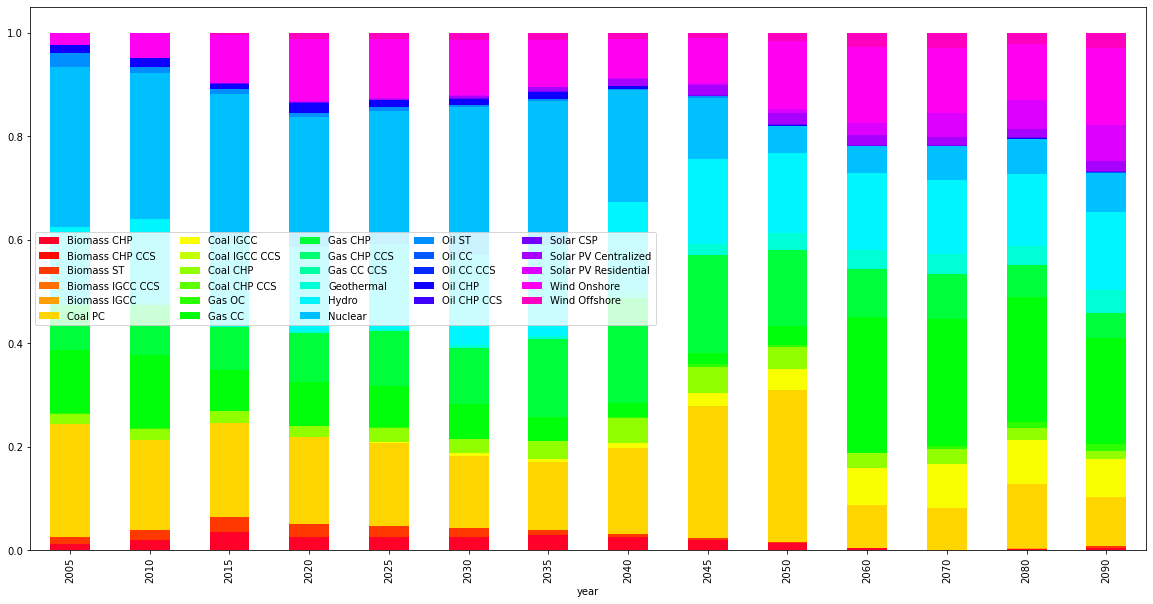

In [15]:
import matplotlib.pyplot as plt

data = ndb.scenarios[0]["external data"].electricity_markets.sel(region="WEU")\
    .to_dataframe("val").unstack()["val"].T

fig = plt.figure()
ax = fig.add_subplot(111)

cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle('color', [cm(1.*i/len(data)) for i in range(len(data))])


data.plot(kind="bar", stacked=True, figsize=(20, 10), ax=ax, cmap=cm)
plt.legend(ncol=5)

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [5]:
from premise.utils import c

In [15]:
ndb.database.loc[(ndb.database[("ecoinvent", c.efficiency)]>1.01),
                 :].sort_values(by=("ecoinvent", c.efficiency), ascending=False).to_excel("eff_above_1.xlsx")